In [1]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

flights = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')

In [2]:
# see notebook acf_trend_and_seasonal.ipynb for step-by-step data clensing

flights['day'] = '01'
flights['year'] = flights['year'].astype(str)
flights['date'] = flights[['year', 'month', 'day']].apply(lambda x: '-'.join(x), axis=1)
flights = flights.set_index( pd.to_datetime( flights['date']) )
flights = flights.drop(['year', 'month', 'day',  'date'], axis=1)
flights.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


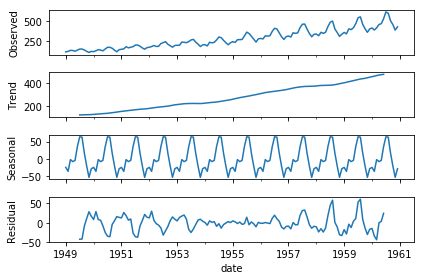

In [3]:
decomposition = sm.tsa.seasonal_decompose(flights, model='additive')
fig = decomposition.plot()
plt.show()